# Geometry computations Example 3: Animal paths

Here we create simple images representing the animals path using geometry linestrings.

In [1]:
import os.path
import cv2
from simba.mixins.geometry_mixin import GeometryMixin
from simba.mixins.config_reader import ConfigReader
from simba.utils.read_write import read_df, find_video_of_file, read_frm_of_video
import matplotlib.pyplot as plt
import matplotlib 
dpi = matplotlib.rcParams['figure.dpi']

In [2]:
### WE DEFINE THE PATH TO THE SIMBA PROJECT CONFIG, THE BODY-PART WE WABT TO USE TO INFER THE PATH, AND THE VIDEO
### THAT WE WANT TO CREATE THE PATH FOR
CONFIG_PATH = '/Users/simon/Desktop/envs/simba/troubleshooting/RAT_NOR/project_folder/project_config.ini'
BP_NAME = 'Nose'
VIDEO_NAME = '2022-06-20_NOB_DOT_4'

In [3]:
### WE READ IN THE PROJECT CONFIG, AND THE POSE-ESTIMATION DATA FOR THE BODY-PART THAT WE WANT TO VISUALIZE THE PATH FOR
config = ConfigReader(config_path=CONFIG_PATH)
data = read_df(os.path.join(config.outlier_corrected_dir, f'{VIDEO_NAME}.csv'), file_type='csv', usecols=[f'{BP_NAME}_x', f'{BP_NAME}_y']).values.astype(int)

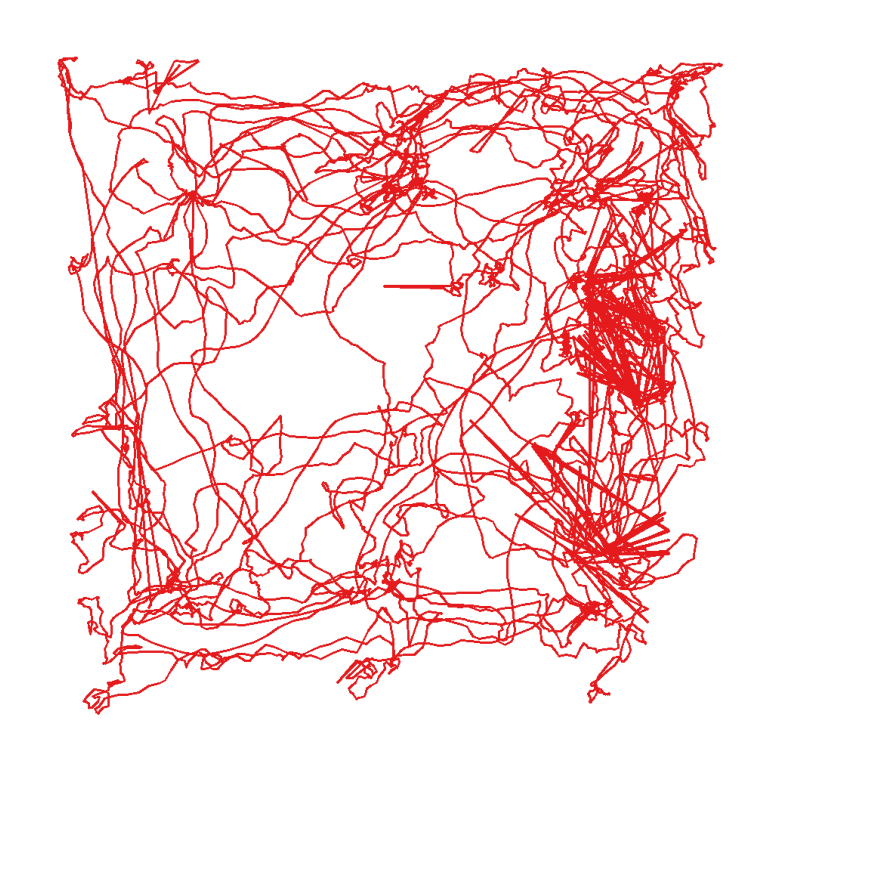

In [4]:
### WE CREATE A LINESTRING OBJECT REPRESENTING THE ANIMAL PATH, AND VISUALIZE IT ON A SIMPLE WHITE BACKGROUND.
linestring = GeometryMixin.to_linestring(data=data)
img = GeometryMixin.view_shapes(shapes=[linestring], bg_img=None, bg_clr=None, size=None, color_palette=None)


height, width, depth = img.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.axis('off')
plt.imshow(img)
plt.show()

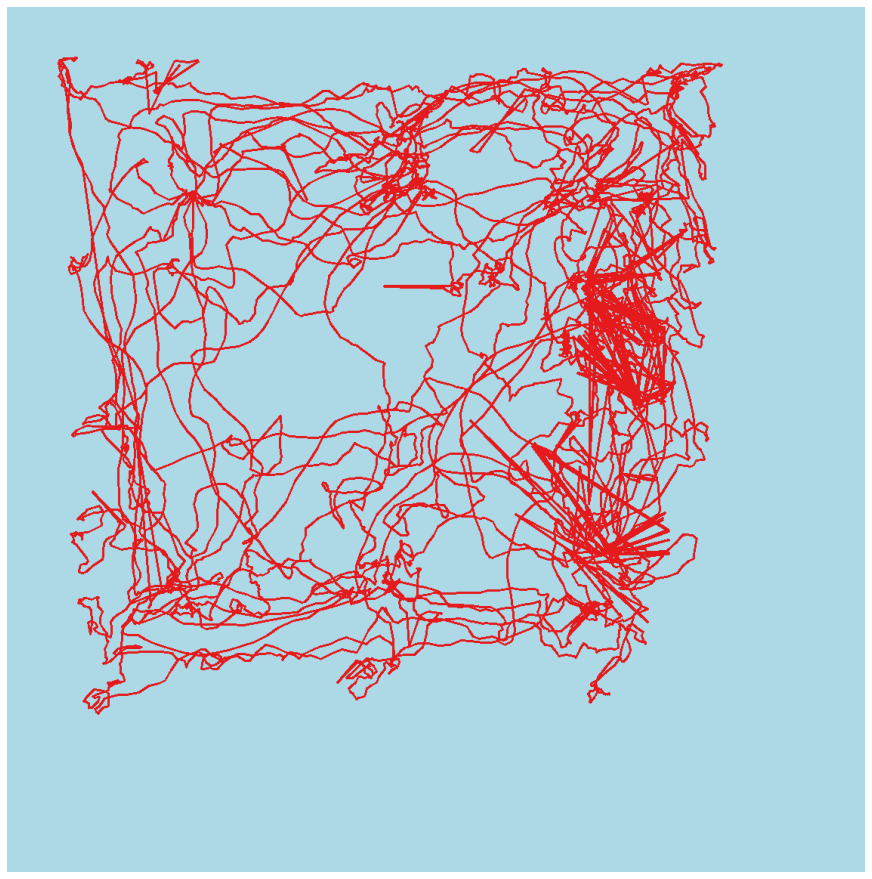

In [5]:
### ALTERNATIVELY, WE MAY WANT TO CHANGE THE BACKGROUND COLOR OF THE PATH PLOT TO MAKE IT MORE SALIENT
### HERE WE SET THE BACKGROUND COLOR TO LIGHT-BLUE (RGB: (173, 216, 230))
img = GeometryMixin.view_shapes(shapes=[linestring], bg_img=None, bg_clr=(173, 216, 230), size=None, color_palette=None)

plt.figure(figsize=figsize)
plt.axis('off')
plt.imshow(img)
plt.show()

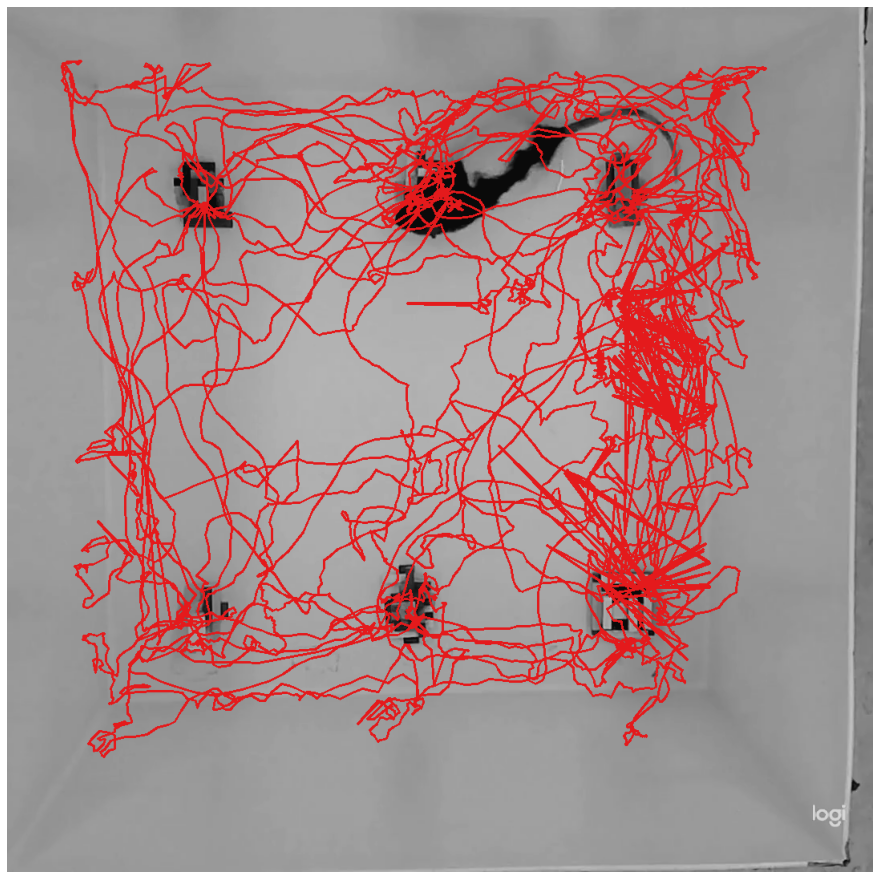

In [6]:
### ALTERNATIVELY, WE MAY WANT THE ACTUAL VIDEO AS A BACKGROUND (WITH SOME OPACITY)
### HERE, WE READ ON A FRAME FROM THE ASSOCIATED VIDEO, SET THE OPACITY OF THAT FRAME TO 80%, AND USE THAT AS A
### BACKGROUND FOR THE PATH PLOT
video_path = find_video_of_file(video_dir=config.video_dir, filename=VIDEO_NAME)
video_frm = read_frm_of_video(video_path=video_path, frame_index=2000, opacity=80)
img = GeometryMixin.view_shapes(shapes=[linestring], bg_img=video_frm, bg_clr=None, size=None, color_palette=None)

plt.figure(figsize=figsize)
plt.axis('off')
plt.imshow(img)
plt.show()

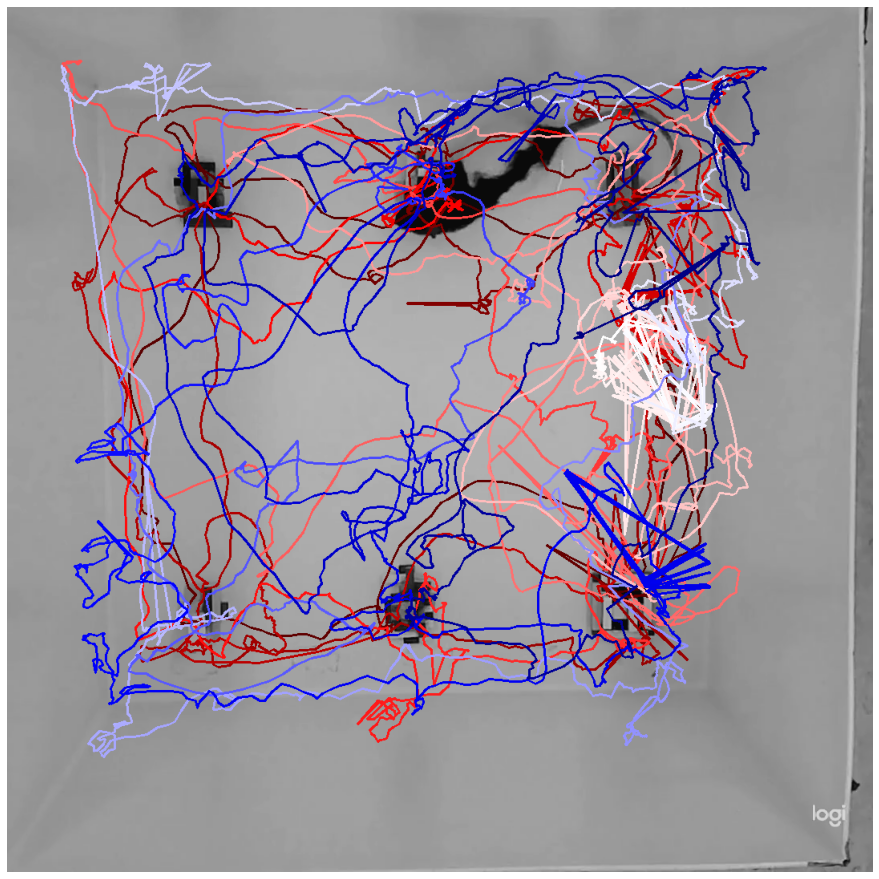

In [7]:
### ALTERNATIVELY, WE MAY WANT TO COLOR THE PATH WITH THE COLOR REPRESENTING THE TIME OF THE SESSION.
### HERE WE USE THE SEISMIC COLOR PALETTE TO COLOR THE PATH FROM EARLY -> LATE IN THE SESSION.
img = GeometryMixin.view_shapes(shapes=[linestring], bg_img=video_frm, bg_clr=None, size=None, color_palette='seismic')

plt.figure(figsize=figsize)
plt.axis('off')
plt.imshow(img)
plt.show()